# CT3_Assignment Heart_Disease_Prediction

## Importing the libraries (1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Loading the data(1)

In [2]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv(r"C:\Users\abhis\Downloads\Question-20240415T062611Z-001\Question\heart_disease_data (2).csv")

In [4]:
# print first 5 rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##  Data Pre-Processing(1)

In [6]:
# number of rows and columns in the dataset
print("Number of rows and columns:", data.shape)

Number of rows and columns: (303, 14)


In [7]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# checking the distribution of Target Variable
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target(1 Mark)

In [12]:
X = data.drop('target', axis=1)

In [13]:
y = data['target']

In [ ]:
### Splitting the Data into Training data & Test Data(1 Mark)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

#### Use  Logistic Regression and evaluate the train accuracy and Test accuracy(1 Mark)

In [17]:
log_reg_model = LogisticRegression(max_iter=1500)

In [18]:
# training the LogisticRegression model with Training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

#### Model Evaluation

#### Accuracy Score

In [19]:
# accuracy on training data
train_predictions = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Logistic Regression - Train Accuracy:", train_accuracy)

Logistic Regression - Train Accuracy: 0.8636363636363636


In [20]:
# accuracy on test data
test_predictions = log_reg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Logistic Regression - Test Accuracy:", test_accuracy)

Logistic Regression - Test Accuracy: 0.8852459016393442


## DecisionTreeClassifier(1 Mark)

### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [21]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)

In [22]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

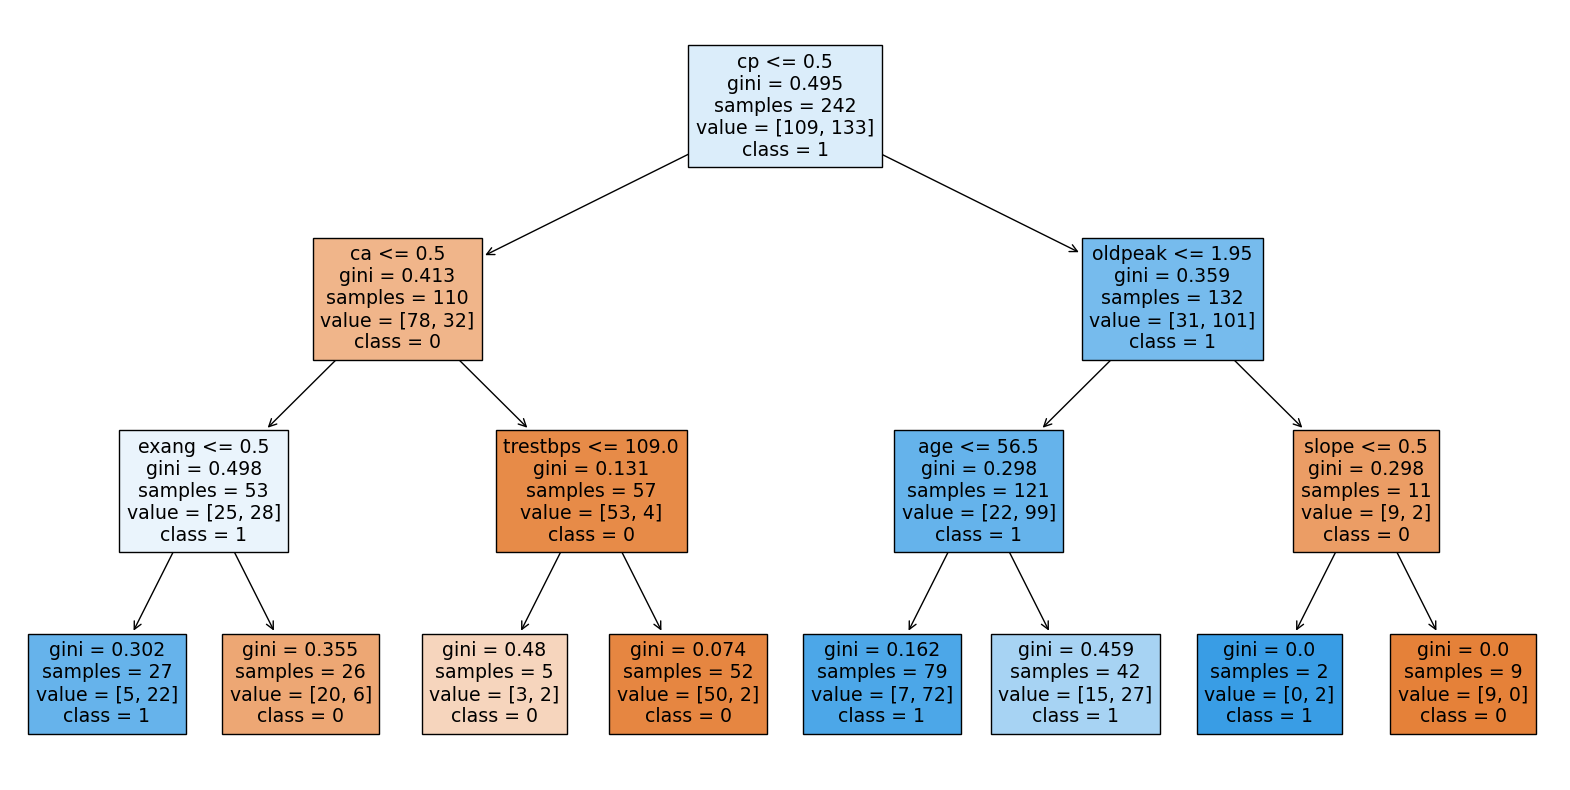

In [23]:
# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()

#### Use BaggingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [24]:
# Initialize Bagging Classifier
bagging_model = BaggingClassifier()

# Training the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predictions on training data
train_predictions_bagging = bagging_model.predict(X_train)

# Predictions on test data
test_predictions_bagging = bagging_model.predict(X_test)

# Calculate accuracy on training data
train_accuracy_bagging = accuracy_score(y_train, train_predictions_bagging)

# Calculate accuracy on test data
test_accuracy_bagging = accuracy_score(y_test, test_predictions_bagging)

print("Bagging Classifier - Train Accuracy:", train_accuracy_bagging)
print("Bagging Classifier - Test Accuracy:", test_accuracy_bagging)

Bagging Classifier - Train Accuracy: 0.9752066115702479
Bagging Classifier - Test Accuracy: 0.819672131147541


#### Use RandomForestClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
random_forest_model = RandomForestClassifier()

# Training the RandomForestClassifier
random_forest_model.fit(X_train, y_train)

# Predictions on training data
train_predictions_rf = random_forest_model.predict(X_train)

# Predictions on test data
test_predictions_rf = random_forest_model.predict(X_test)

# Calculate accuracy on training data
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)

# Calculate accuracy on test data
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

In [26]:
print("Random Forest Classifier - Train Accuracy:", train_accuracy_rf)
print("Random Forest Classifier - Test Accuracy:", test_accuracy_rf)

Random Forest Classifier - Train Accuracy: 1.0
Random Forest Classifier - Test Accuracy: 0.8524590163934426


#### AdaBoostClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier
adaboost_model = AdaBoostClassifier()

# Training the AdaBoostClassifier
adaboost_model.fit(X_train, y_train)

# Predictions on training data
train_predictions_adaboost = adaboost_model.predict(X_train)

# Predictions on test data
test_predictions_adaboost = adaboost_model.predict(X_test)

# Calculate accuracy on training data
train_accuracy_adaboost = accuracy_score(y_train, train_predictions_adaboost)

# Calculate accuracy on test data
test_accuracy_adaboost = accuracy_score(y_test, test_predictions_adaboost)

In [28]:
print("AdaBoost Classifier - Train Accuracy:", train_accuracy_adaboost)
print("AdaBoost Classifier - Test Accuracy:", test_accuracy_adaboost)

AdaBoost Classifier - Train Accuracy: 0.9380165289256198
AdaBoost Classifier - Test Accuracy: 0.8032786885245902


#### Use GradientBoostingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [29]:
# Initialize GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier()

# Training the GradientBoostingClassifier
gradient_boosting_model.fit(X_train, y_train)

# Predictions on training data
train_predictions_gradient_boosting = gradient_boosting_model.predict(X_train)

# Predictions on test data
test_predictions_gradient_boosting = gradient_boosting_model.predict(X_test)

# Calculate accuracy on training data
train_accuracy_gradient_boosting = accuracy_score(y_train, train_predictions_gradient_boosting)

# Calculate accuracy on test data
test_accuracy_gradient_boosting = accuracy_score(y_test, test_predictions_gradient_boosting)


In [30]:
print("Gradient Boosting Classifier - Train Accuracy:", train_accuracy_gradient_boosting)
print("Gradient Boosting Classifier - Test Accuracy:", test_accuracy_gradient_boosting)

Gradient Boosting Classifier - Train Accuracy: 1.0
Gradient Boosting Classifier - Test Accuracy: 0.7704918032786885


#### Use VotingClassifier and evaluate the train accuracy and Test accuracy(1 Mark)

In [31]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

# Initialize the individual classifiers
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
bagging_classifier = BaggingClassifier()

# Initialize the VotingClassifier with the individual classifiers including BaggingClassifier
voting_model = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('dt', decision_tree),
    ('rf', random_forest),
    ('adb', adaboost),
    ('gbc', gradient_boosting),
    ('bc', bagging_classifier)
])

# Training the VotingClassifier
voting_model.fit(X_train, y_train)

# Predictions on training data
train_predictions_voting = voting_model.predict(X_train)

# Predictions on test data
test_predictions_voting = voting_model.predict(X_test)

# Calculate accuracy on training data
train_accuracy_voting = accuracy_score(y_train, train_predictions_voting)

# Calculate accuracy on test data
test_accuracy_voting = accuracy_score(y_test, test_predictions_voting)


In [32]:
print("Voting Classifier - Train Accuracy:", train_accuracy_voting)
print("Voting Classifier - Test Accuracy:", test_accuracy_voting)

Voting Classifier - Train Accuracy: 0.987603305785124
Voting Classifier - Test Accuracy: 0.8032786885245902


####  Compare the Logistic Regression,DecisionTreeClassifier,Bagging Classifier,Random Forest,AdaBoost, Gradient Boosting, Votingand visualize Train and Test Accuracy(3 Mark)

In [33]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Bagging Classifier": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier(max_depth=3)),
        ('rf', RandomForestClassifier()),
        ('adb', AdaBoostClassifier()),
        ('gbc', GradientBoostingClassifier())
    ])
}

In [34]:
train_accuracy = []
test_accuracy = []

In [35]:
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    train_predictions = classifier.predict(X_train_scaled)
    test_predictions = classifier.predict(X_test_scaled)
    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_accuracy.append(accuracy_score(y_test, test_predictions))

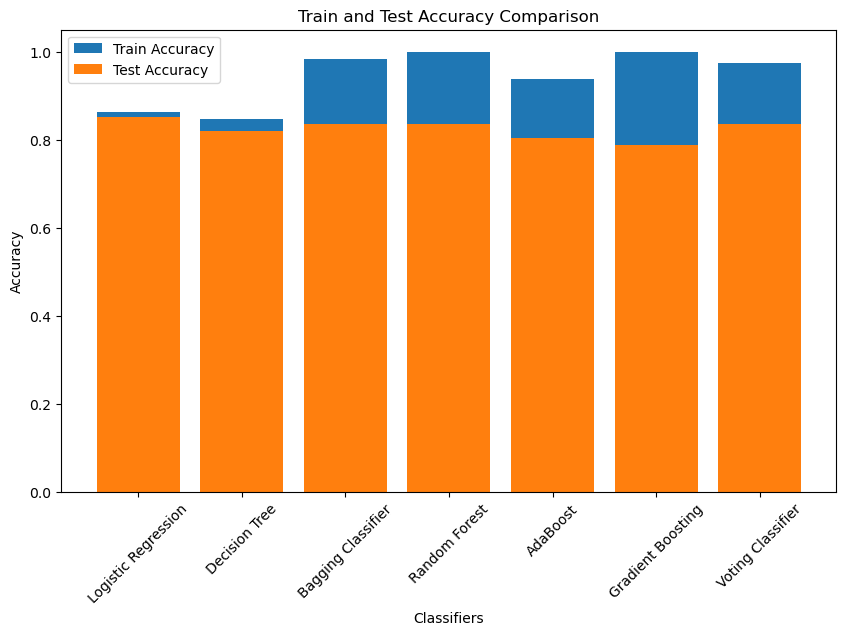

In [36]:
# Visualize train and test accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), train_accuracy, label='Train Accuracy')
plt.bar(classifiers.keys(), test_accuracy, label='Test Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()